In [ ]:
from google.colab import files
uploaded = files. upload ( )

Saving Fake News.xlsx to Fake News.xlsx
Saving True News.xlsx to True News.xlsx


In [3]:
df_true = pd.read_excel("True News.xlsx")
df_true.to_csv("True News.csv", index=False)

In [4]:
df_true.head()

,Column1,short_description
0,1,राम मंदिर प्राण-प्रतिष्ठा: फर्श पर सोना-नारियल...
1,2,Ayodhya Ram Mandir Pran Pratishtha से पहले कठि...
2,3,8 PHOTOS:देखें रामलला की प्राण-प्रतिष्ठा से पह...
3,4,"22 जनवरी को अयोध्या में कैसा रहेगा मौसम, जानें..."
4,5,"सोलापुर में PM की 15 बड़ी बातें, मोदी के 22 जन..."


In [5]:
df_fake = pd.read_excel("Fake News.xlsx")
df_fake.to_csv("Fake News.csv", index=False)

In [6]:
df_fake.head()

,Column1,short_description
0,1,गडकरी ने नहीं दिया है पीएम मोदी और राम मंदिर ...
1,2,राम मंदिर वहीं बना है जहां रामलला विराजमान थे...
2,3,"यूपी में बोर्ड की परीक्षा नहीं हुई है रद्द, य..."
3,4,"नेपाल से अयोध्या के जुलूस का नहीं, ये ग्रेटर ..."
4,5,एमपी का सीएम बनने के बाद मोहन यादव ने दी जनता...


In [7]:
true_df = df_true.drop(columns=["Column1"], errors="ignore")
fake_df = df_fake.drop(columns=["Column1"], errors="ignore")
true_df['label'] = 0
fake_df['label'] = 1
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

In [8]:
combined_df.tail()

,short_description,label
6719,राजस्थान की महिला MLA की छवि खराब करने के लि...,1
6720,मध्य प्रदेश की साल 2019 की घटना को हालिया बत...,1
6721,"खुर्जा में बोइंग का वेयरहाउस खुला, लेकिन वायर...",1
6722,जलते हुए समुद्री जहाज का यह वीडियो 2020 का है...,1
6723,"ढांचे वाली जगह पर ही बन रहा मंदिर, तीन किलोमी...",1


In [9]:
import pandas as pd
df = pd.DataFrame(combined_df)
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv('data.csv', index=False)
print("saved")
df.head()

saved


,short_description,label
0,Cash for Query case: दर्शन हीरानंदानी ने तोड़ी...,0
1,यूपी से बुलडोजर लेकर राजस्थान जाती ट्रेन का न...,1
2,Entertainment Top 5 News 21 Jan: 'फाइटर' में क...,0
3,जमुई में हिंदू प्रेमी युगल की शादी के मामले क...,1
4,"ढांचे वाली जगह पर ही बन रहा मंदिर, तीन किलोमी...",1


In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

df = pd.read_csv('data.csv')

def preprocessing(text):
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text.lower())
    return " ".join(tokens)

df['short_description'] = df['short_description'].astype(str).apply(preprocessing)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['short_description'])
y = df['label']

print("Vectorization complete")
print(X.toarray()[:5])


Vectorization complete
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_rep)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       803
           1       0.97      0.94      0.95       542

    accuracy                           0.96      1345
   macro avg       0.96      0.96      0.96      1345
weighted avg       0.96      0.96      0.96      1345

Accuracy: 0.9628252788104089


In [15]:
import joblib
joblib.dump(vectorizer, 'vectorizer.pkl')
vectorizer = joblib.load('vectorizer.pkl')

In [16]:
import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [17]:
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [19]:
test_news = ["₹2000 से ऊपर के UPI ट्रांजैक्शन पर GST वसूले जाने का भ्रामक दावा वायरल; वित्त मंत्रालय ने किया खंडन"]

test_news_preprocessed = [preprocessing(news) for news in test_news]
test_news_vectorized = vectorizer.transform(test_news_preprocessed)

prediction = loaded_model.predict(test_news_vectorized)
print("fake" if prediction[0]==1 else "real")

fake


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6724 entries, 0 to 6723
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   short_description  6724 non-null   object
 1   label              6724 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 105.2+ KB


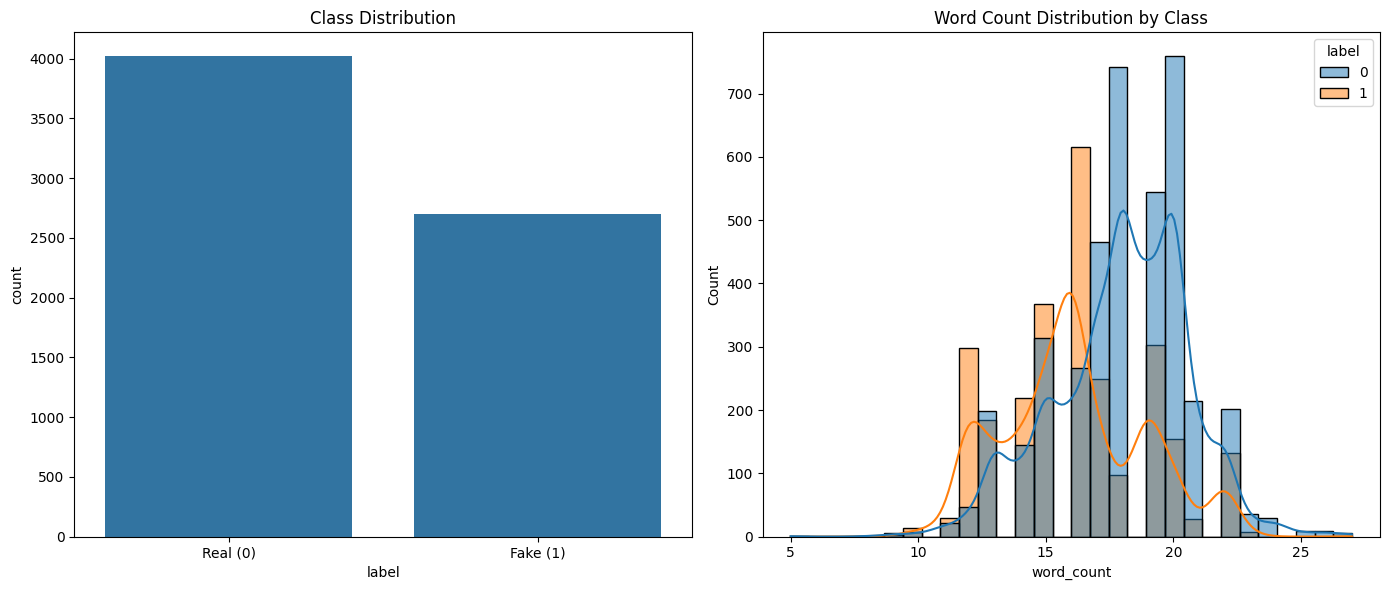

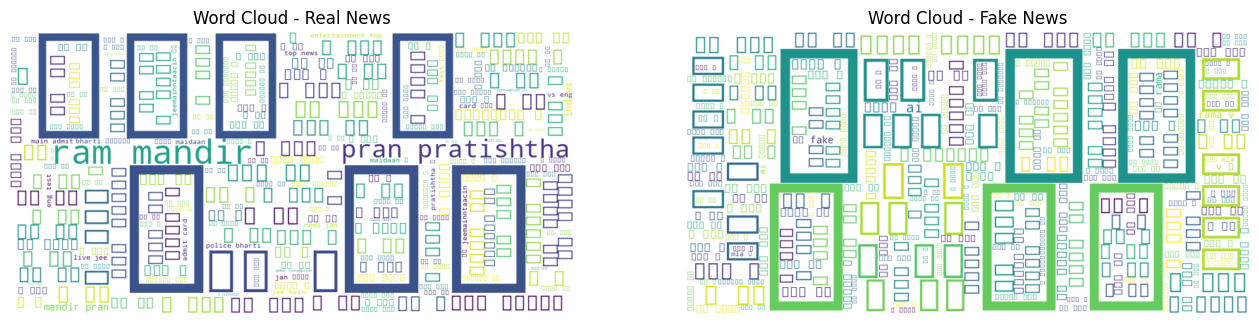

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Basic info
df_info = df.info()
df_describe = df.describe(include='all')
missing_values = df.isnull().sum()

# Class distribution
class_counts = df['label'].value_counts()

# Word count
df['word_count'] = df['short_description'].apply(lambda x: len(x.split()))
avg_word_count = df.groupby('label')['word_count'].mean()

# WordClouds
fake_text = " ".join(df[df['label'] == 1]['short_description'])
real_text = " ".join(df[df['label'] == 0]['short_description'])

wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

# Class distribution and word count hist
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Real (0)', 'Fake (1)'])

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='word_count', bins=30, hue='label', kde=True)
plt.title('Word Count Distribution by Class')

plt.tight_layout()
plt.show()

# Word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Real News')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Fake News')

plt.show()
